## Importing the data and libraries

In [56]:
import pandas as pd
import numpy as np


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
# data import
df=pd.read_csv("data/data.csv")
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


#### EDA & Preprocessing

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [60]:
df.shape


(16857, 29)

#### As Column 1 ,2, 3, 4, 5 is physical QUANTITY having numerical value so it should not be object suggesting that some non-numeric character or NaN #### 


In [63]:
df.isnull().any() # this give total number of missing values in each column

timestamp                       False
equipment_energy_consumption     True
lighting_energy                  True
zone1_temperature                True
zone1_humidity                   True
zone2_temperature                True
zone2_humidity                   True
zone3_temperature                True
zone3_humidity                   True
zone4_temperature                True
zone4_humidity                   True
zone5_temperature                True
zone5_humidity                   True
zone6_temperature                True
zone6_humidity                   True
zone7_temperature                True
zone7_humidity                   True
zone8_temperature                True
zone8_humidity                   True
zone9_temperature                True
zone9_humidity                   True
outdoor_temperature              True
atmospheric_pressure             True
outdoor_humidity                 True
wind_speed                       True
visibility_index                 True
dew_point   

In [65]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [66]:
# data cleaning
# remove the non- numeric values from the dataframe
# i have done it previously , so i am importing the csv file
df=pd.read_csv("non_nemeric_removed.csv")
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [70]:
df.drop("timestamp",axis=1,inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12799 entries, 0 to 12798
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  12799 non-null  float64
 1   lighting_energy               12799 non-null  float64
 2   zone1_temperature             12799 non-null  float64
 3   zone1_humidity                12799 non-null  float64
 4   zone2_temperature             12799 non-null  float64
 5   zone2_humidity                12118 non-null  float64
 6   zone3_temperature             12200 non-null  float64
 7   zone3_humidity                12145 non-null  float64
 8   zone4_temperature             12160 non-null  float64
 9   zone4_humidity                12207 non-null  float64
 10  zone5_temperature             12169 non-null  float64
 11  zone5_humidity                12191 non-null  float64
 12  zone6_temperature             12143 non-null  float64
 13  z

In [75]:
df.isnull().any()

equipment_energy_consumption    False
lighting_energy                 False
zone1_temperature               False
zone1_humidity                  False
zone2_temperature               False
zone2_humidity                   True
zone3_temperature                True
zone3_humidity                   True
zone4_temperature                True
zone4_humidity                   True
zone5_temperature                True
zone5_humidity                   True
zone6_temperature                True
zone6_humidity                   True
zone7_temperature                True
zone7_humidity                   True
zone8_temperature                True
zone8_humidity                   True
zone9_temperature                True
zone9_humidity                   True
outdoor_temperature              True
atmospheric_pressure             True
outdoor_humidity                 True
wind_speed                       True
visibility_index                 True
dew_point                        True
random_varia


####  taking median for null values in column 



In [76]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Fill missing values with median for each numeric column
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [80]:
df.isnull().any()  # all null values replaced with medians
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,38.400000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [81]:
#separating features and target variable
features=df.iloc[:, 1:]
prediction= df.iloc[:,0]

In [141]:
###
features=df_combined.iloc[:, :-1]
prediction= df_combined.iloc[:,-1]

In [225]:
features.head()
features.shape

(10239, 4)

In [235]:
features.head()

,lighting_energy,zone2_temperature,zone3_temperature,zone6_temperature
5192,0.0,18.700000,20.79,6.300000
4982,0.0,18.790000,21.26,1.200000
9256,0.0,19.600000,24.70,9.600000
8015,0.0,20.356667,22.10,6.966667
4972,0.0,19.600000,21.20,2.500000


In [236]:
prediction.head()

5192    40.0
4982    40.0
9256    60.0
8015    50.0
4972    50.0
Name: equipment_energy_consumption, dtype: float64

#### deviding into training and test data


In [228]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( features,prediction , test_size=0.2, random_state=42,shuffle=True)  # 20% test data


# EDA

In [237]:
columns=df_combined_copy.columns.tolist()

In [146]:
c=columns[:-1]
# list of only feature columns only

In [242]:
# training data separated
Train_data=pd.concat([X_train, y_train], axis='columns',names=c)
Train_data.head(-5)

,lighting_energy,zone2_temperature,zone3_temperature,zone6_temperature,equipment_energy_consumption
3780,10.000000,17.856667,20.290000,2.290000,40.000000
11356,-77.787786,18.356667,23.290000,1.600000,50.000000
3460,10.000000,19.790000,20.963333,2.700000,70.000000
505,0.000000,20.500000,20.600000,0.566667,50.000000
3455,0.000000,20.000000,20.890000,2.900000,60.000000
...,...,...,...,...,...
12393,0.000000,22.463333,23.290000,14.066667,130.000000
12466,10.000000,26.133333,23.100000,14.793333,50.000000
755,0.000000,18.133333,19.760000,-2.328333,40.000000
7808,-77.787786,19.150000,22.290000,5.590000,-944.566411


In [ ]:
equipment_energy_consumption    False
lighting_energy                 False
zone1_temperature               False
zone1_humidity                  False
zone2_temperature               False
zone2_humidity                   True
zone3_temperature                True
zone3_humidity                   True
zone4_temperature                True
zone4_humidity                   True
zone5_temperature                True
zone5_humidity                   True
zone6_temperature                True
zone6_humidity                   True
zone7_temperature                True
zone7_humidity                   True
zone8_temperature                True
zone8_humidity                   True
zone9_temperature                True
zone9_humidity                   True
outdoor_temperature              True
atmospheric_pressure             True
outdoor_humidity                 True
wind_speed                       True
visibility_index                 True
dew_point                        True
random_variable1                 True
random_variable2                 True

In [243]:
Train_data.describe()

,lighting_energy,zone2_temperature,zone3_temperature,zone6_temperature,equipment_energy_consumption
count,8191.000000,8191.000000,8191.000000,8191.000000,8191.000000
mean,3.806974,19.812356,21.662720,6.499091,97.524678
std,14.342631,2.996848,2.582007,8.713709,176.897071
min,-86.002966,2.988199,6.543921,-42.987365,-944.566411
25%,0.000000,18.600000,20.600000,3.133333,50.000000
50%,0.000000,19.633333,21.790000,6.300000,60.000000
75%,0.000000,20.823333,22.666667,9.600000,100.000000
max,86.002966,36.552882,36.823982,55.932271,1139.985693


In [246]:
#correlation analysis

pearson_corr = df_combined_copy.corr(method='pearson')
pearson_corr


,lighting_energy,zone2_temperature,zone3_temperature,zone6_temperature,equipment_energy_consumption
lighting_energy,1.000000,0.013204,-0.018463,-0.000582,0.066929
zone2_temperature,0.013204,1.000000,0.169506,0.209805,0.051250
zone3_temperature,-0.018463,0.169506,1.000000,0.156259,0.038849
zone6_temperature,-0.000582,0.209805,0.156259,1.000000,0.035438
equipment_energy_consumption,0.066929,0.051250,0.038849,0.035438,1.000000


In [247]:
df_combined_copy.shape

(10239, 5)

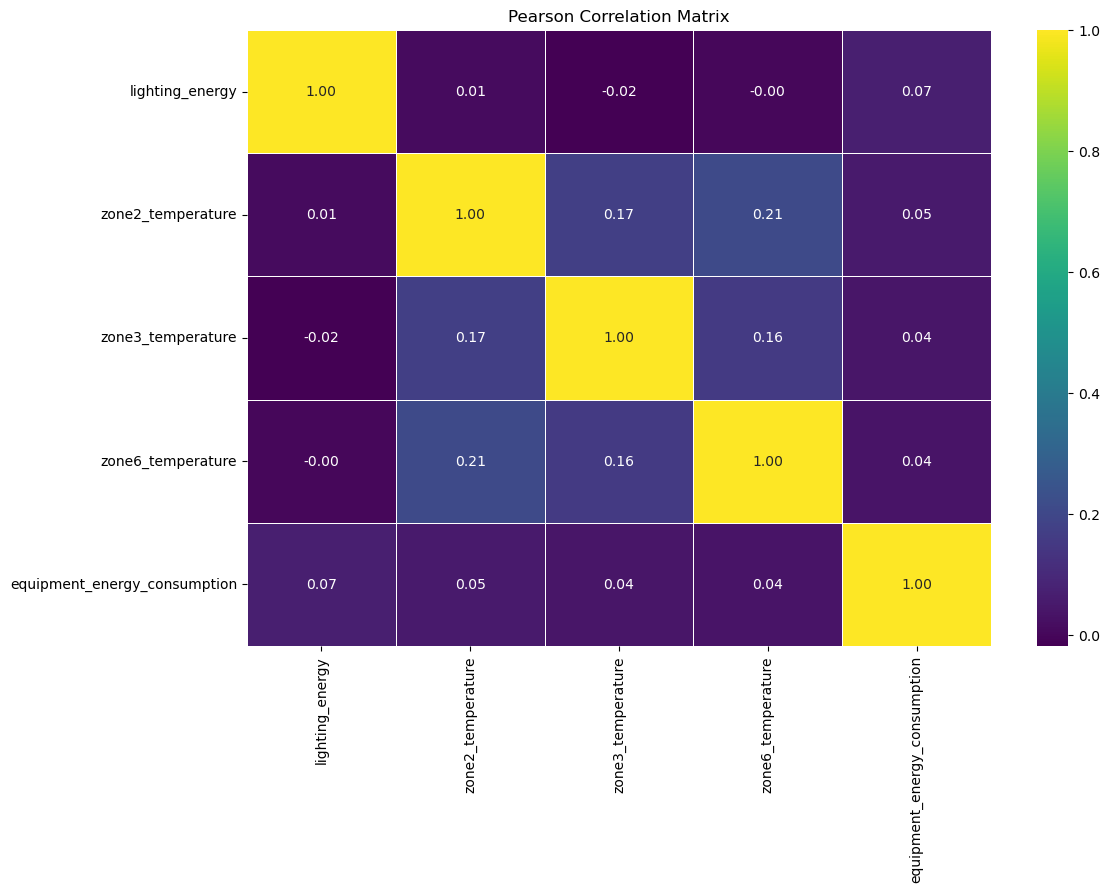

In [248]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("Pearson Correlation Matrix")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3948\2140037822.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spearman_corr.values, y=spearman_corr.index, palette="coolwarm")


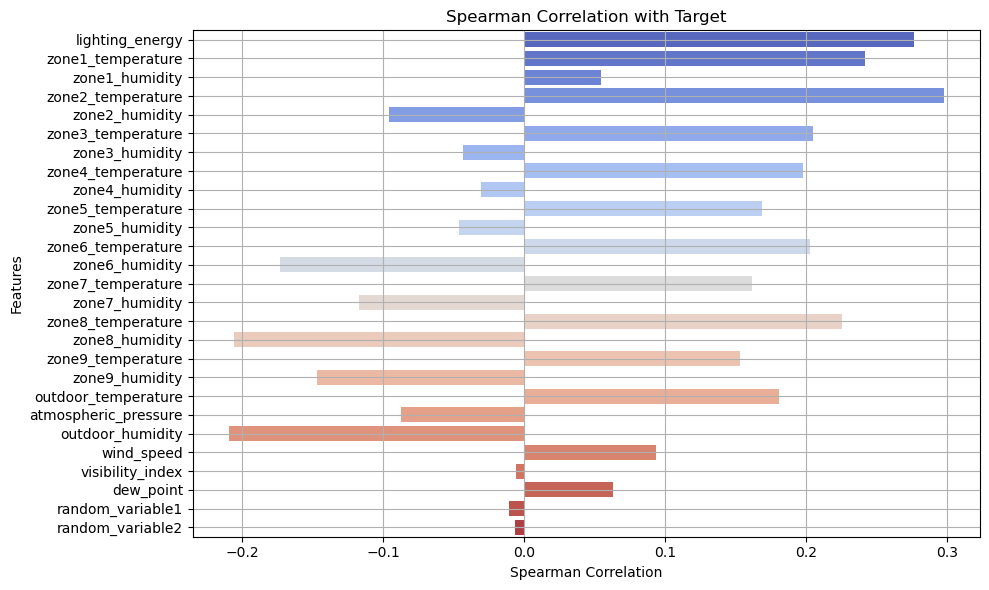

In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Spearman correlation with target
spearman_corr = df.corr(method='spearman')["equipment_energy_consumption"].drop("equipment_energy_consumption")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=spearman_corr.values, y=spearman_corr.index, palette="coolwarm")
plt.title("Spearman Correlation with Target")
plt.xlabel("Spearman Correlation")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()



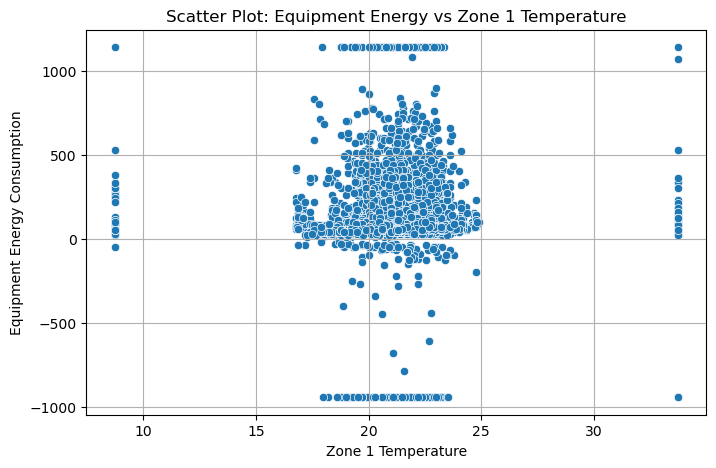

In [109]:

# Scatter plot between dependent and one independent variable
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Train_data["zone1_temperature"], y=Train_data["equipment_energy_consumption"])
plt.xlabel("Zone 1 Temperature")
plt.ylabel("Equipment Energy Consumption")
plt.title("Scatter Plot: Equipment Energy vs Zone 1 Temperature")
plt.grid(True)
plt.show()

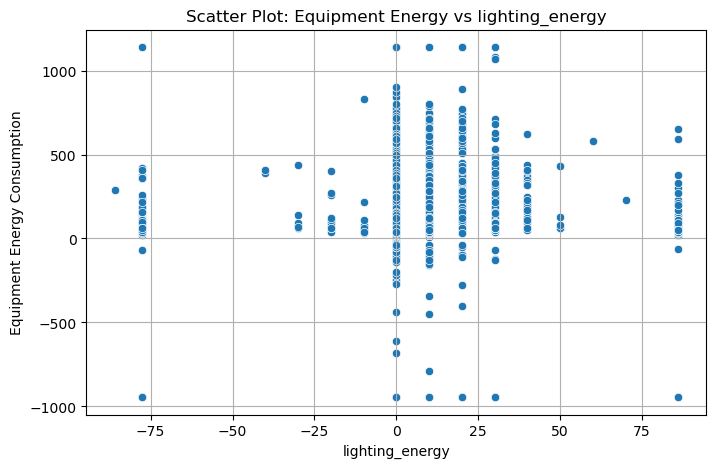

In [110]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Train_data["lighting_energy"], y=Train_data["equipment_energy_consumption"])
plt.xlabel("lighting_energy")
plt.ylabel("Equipment Energy Consumption")
plt.title("Scatter Plot: Equipment Energy vs lighting_energy")
plt.grid(True)
plt.show()

In [229]:
# Import Linear Regression class
from sklearn.linear_model import LinearRegression

# Define an object of Linear Regression class
model = LinearRegression()

# Training the model on train data
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)



In [230]:
# Evaluate the model using commonly used metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training performance
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the evaluation metrics on train data
print("Evaluation metrics: Train Data")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)


Evaluation metrics: Train Data
Mean absolute error:  80.20403464208935
Mean squared error:  30980.392290556276
R-squared score:  0.009855334832068907


In [199]:

y_pred = lr_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R² Score: {r2:.3f}")


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- atmospheric_pressure
- dew_point
- outdoor_humidity
- outdoor_temperature
- visibility_index
- ...


In [214]:
Train_data.corr()["equipment_energy_consumption"].sort_values(ascending=False)


equipment_energy_consumption    1.000000
lighting_energy                 0.078019
zone2_temperature               0.052940
zone3_temperature               0.033071
zone6_temperature               0.032071
zone5_humidity                  0.028765
zone1_humidity                  0.026819
zone4_temperature               0.024062
zone5_temperature               0.011002
zone1_temperature               0.008402
zone4_humidity                  0.006780
zone3_humidity                  0.005532
dew_point                       0.005436
visibility_index                0.002885
zone6_humidity                 -0.004209
zone2_humidity                 -0.011059
random_variable2               -0.022644
random_variable1               -0.026430
Name: equipment_energy_consumption, dtype: float64

In [119]:
t2=Train_data.iloc[:,0:13]


In [120]:
t2.head()

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity
5192,0.0,20.600000,35.0000,18.700000,35.79,20.79,36.400000,35.921144,33.50,17.700000,51.400000,6.300000,56.760000
4982,0.0,20.700000,39.0600,18.790000,40.09,21.26,38.560000,20.600000,36.00,19.000000,43.090000,1.200000,81.533333
9256,0.0,22.166667,43.7900,19.600000,47.50,24.70,41.000000,21.290000,42.70,20.890000,57.326667,9.600000,53.663333
8015,0.0,22.290000,39.7675,20.356667,41.53,22.10,38.126667,4.613485,39.03,20.600000,52.896667,6.966667,59.696667
4972,0.0,21.356667,39.2900,19.600000,39.29,21.20,38.000000,21.426667,36.03,19.264286,43.940000,2.500000,80.695000


In [122]:
t3=Train_data.iloc[:,-5:]

In [123]:
df_combined = pd.concat([t2, t3], axis=1)

In [124]:
df_combined.head()

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,visibility_index,dew_point,random_variable1,random_variable2,equipment_energy_consumption
5192,0.0,20.600000,35.0000,18.700000,35.79,20.79,36.400000,35.921144,33.50,17.700000,51.400000,6.300000,56.760000,23.000000,2.766667,170.156325,14.241021,40.0
4982,0.0,20.700000,39.0600,18.790000,40.09,21.26,38.560000,20.600000,36.00,19.000000,43.090000,1.200000,81.533333,48.666667,0.383333,29.816946,29.816946,40.0
9256,0.0,22.166667,43.7900,19.600000,47.50,24.70,41.000000,21.290000,42.70,20.890000,57.326667,9.600000,53.663333,40.000000,7.516667,42.592119,42.592119,60.0
8015,0.0,22.290000,39.7675,20.356667,41.53,22.10,38.126667,4.613485,39.03,20.600000,52.896667,6.966667,59.696667,58.000000,5.450000,26.744565,26.744565,50.0
4972,0.0,21.356667,39.2900,19.600000,39.29,21.20,38.000000,21.426667,36.03,19.264286,43.940000,2.500000,80.695000,51.333333,0.866667,3.627883,3.627883,50.0


In [156]:
df_combined.shape

(10239, 18)

In [232]:
df_combined.head()

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,visibility_index,dew_point,random_variable1,random_variable2,equipment_energy_consumption
5192,0.0,20.600000,35.0000,18.700000,35.79,20.79,36.400000,35.921144,33.50,17.700000,51.400000,6.300000,56.760000,23.000000,2.766667,170.156325,14.241021,40.0
4982,0.0,20.700000,39.0600,18.790000,40.09,21.26,38.560000,20.600000,36.00,19.000000,43.090000,1.200000,81.533333,48.666667,0.383333,29.816946,29.816946,40.0
9256,0.0,22.166667,43.7900,19.600000,47.50,24.70,41.000000,21.290000,42.70,20.890000,57.326667,9.600000,53.663333,40.000000,7.516667,42.592119,42.592119,60.0
8015,0.0,22.290000,39.7675,20.356667,41.53,22.10,38.126667,4.613485,39.03,20.600000,52.896667,6.966667,59.696667,58.000000,5.450000,26.744565,26.744565,50.0
4972,0.0,21.356667,39.2900,19.600000,39.29,21.20,38.000000,21.426667,36.03,19.264286,43.940000,2.500000,80.695000,51.333333,0.866667,3.627883,3.627883,50.0


In [ ]:
ighting_energy                 0.066929
zone2_temperature               0.051250
zone3_temperature               0.038849
zone6_temperature               0.035438
zone1_humidity                  0.030281
zone4_temperature               0.025422
zone5_humidity                  0.021788
zone5_temperature               0.014050
zone1_temperature               0.013072

##
equipment_energy_consumption    1.000000
lighting_energy                 0.078019
zone2_temperature               0.052940
zone3_temperature               0.033071
zone6_temperature               0.032071

In [181]:
df_combined_copy=df_combined.copy()


In [233]:
df_new=df_combined_copy.drop("random_variable2",axis=1,inplace=True)
df_combined_copy.head()


KeyError: "['random_variable2'] not found in axis"

In [222]:
prediction=df_combined_copy.iloc[:,-1]

In [223]:
features=df_combined_copy.iloc[:,:-1]

In [234]:
features.head()
prediction.head()

5192    40.0
4982    40.0
9256    60.0
8015    50.0
4972    50.0
Name: equipment_energy_consumption, dtype: float64

In [209]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Kernel Ridge Regression model (RBF kernel)
model = KernelRidge(kernel='rbf')

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred_test = model.predict(X_test)

# Evaluate performance on test data
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print("Evaluation metrics: Test Data")
print("Mean Absolute Error: ", mae_test)
print("Mean Squared Error: ", mse_test)
print("R² Score: ", r2_test)


Evaluation metrics: Test Data
Mean Absolute Error:  95.23829591000245
Mean Squared Error:  37451.88716115704
R² Score:  -0.12716498444203128


In [7]:
num_cols = df.columns[:28]
n_cols = 4
n_rows = len(num_cols) // n_cols + 1

plt.figure(figsize=(20, n_rows * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()



KeyboardInterrupt



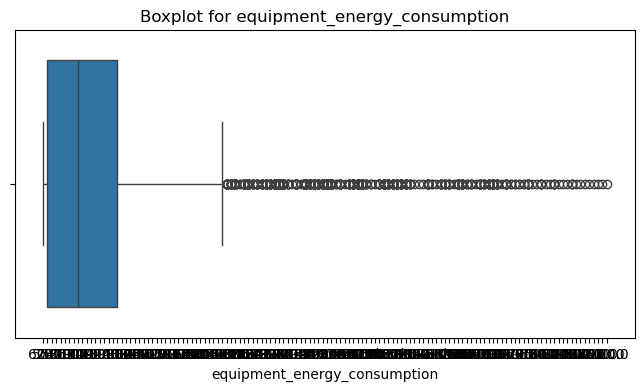

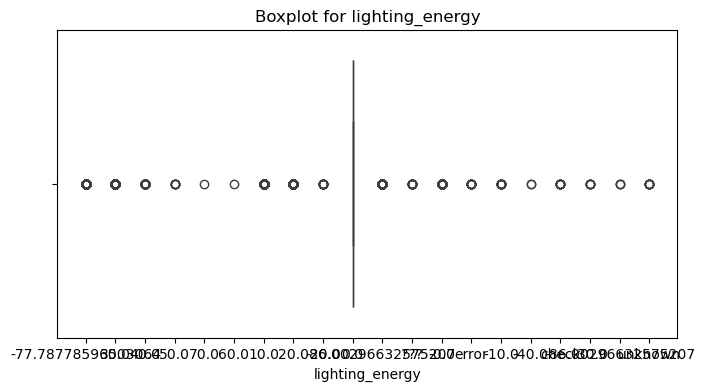

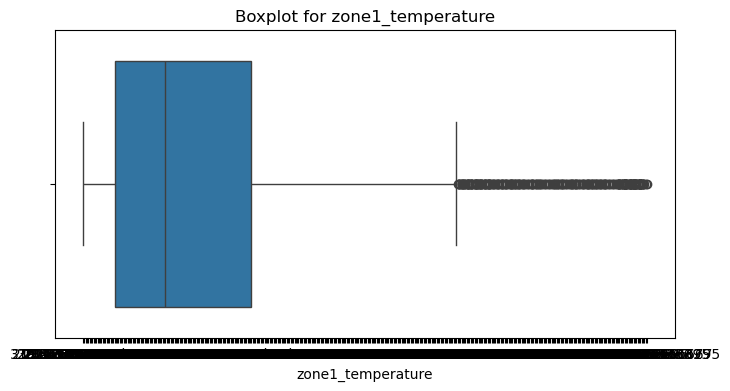

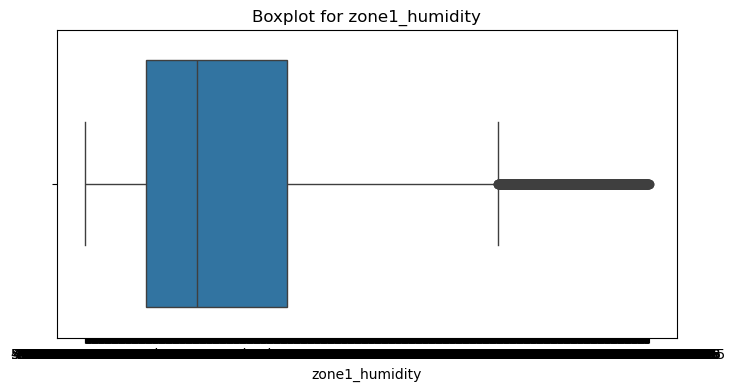

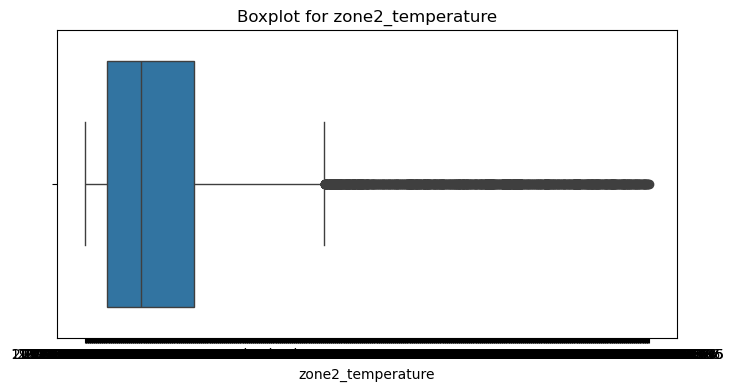

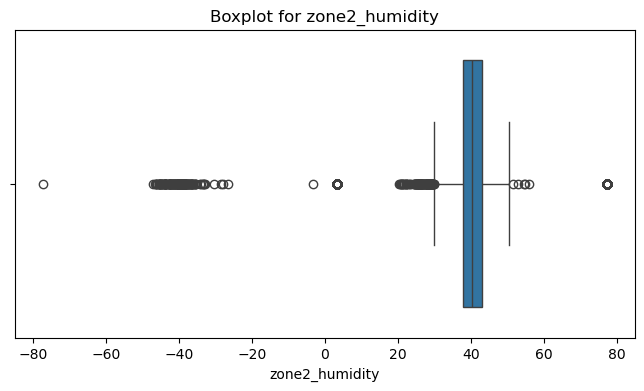

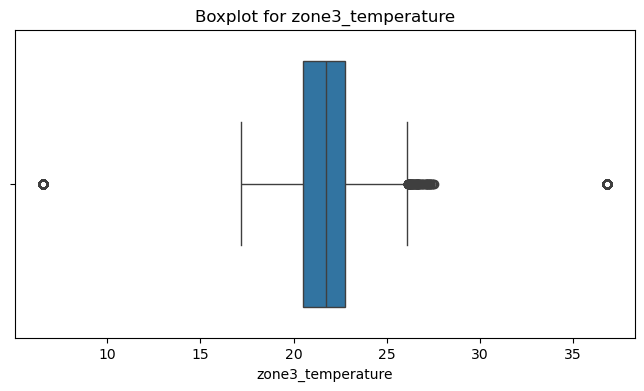

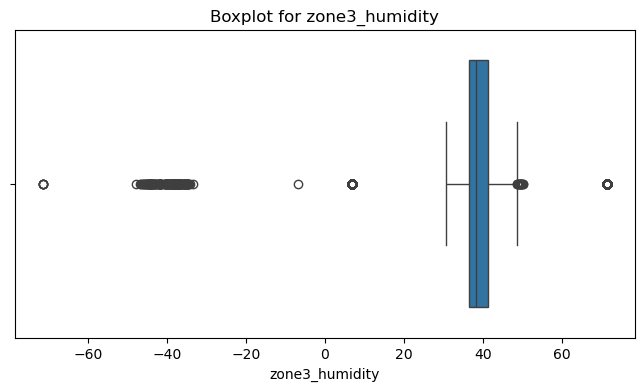

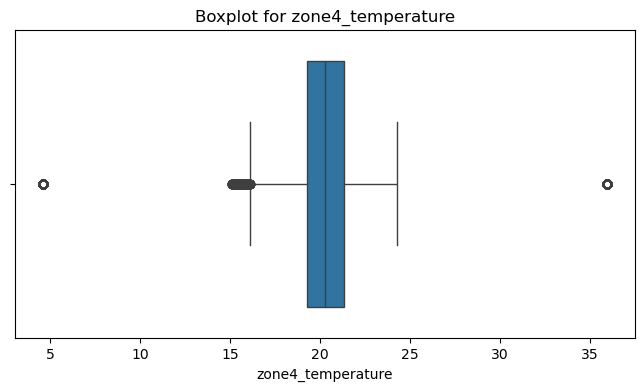

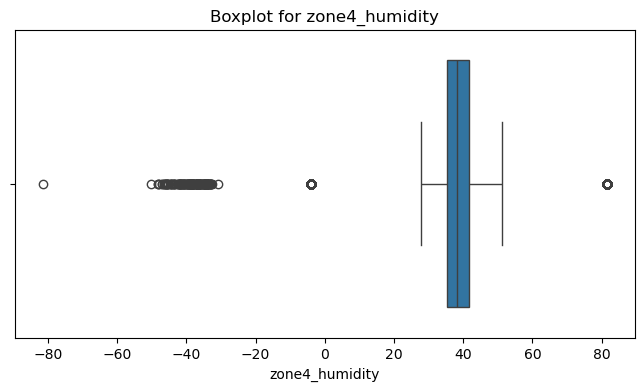

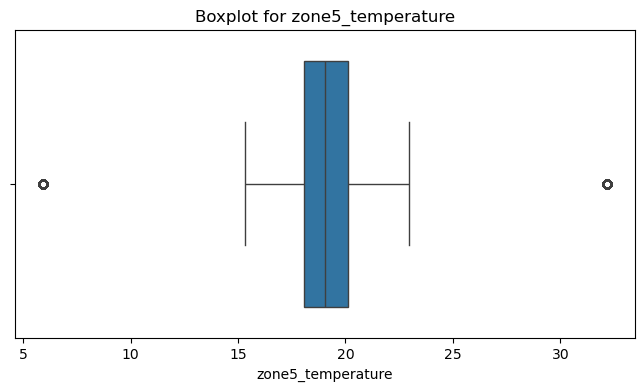

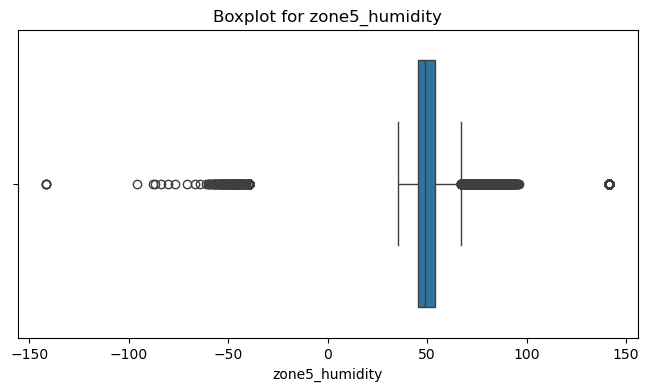

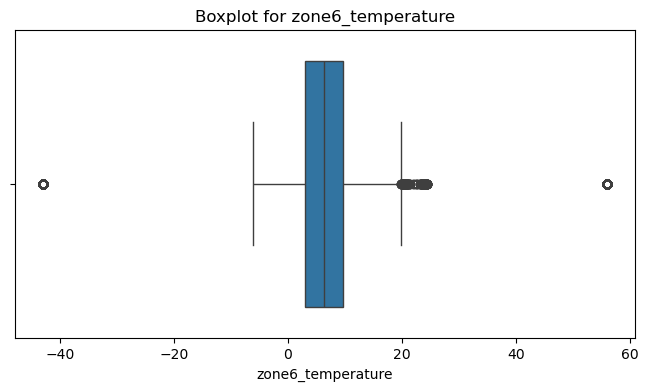

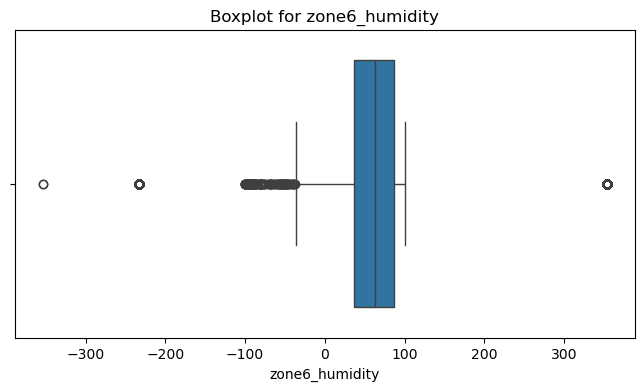

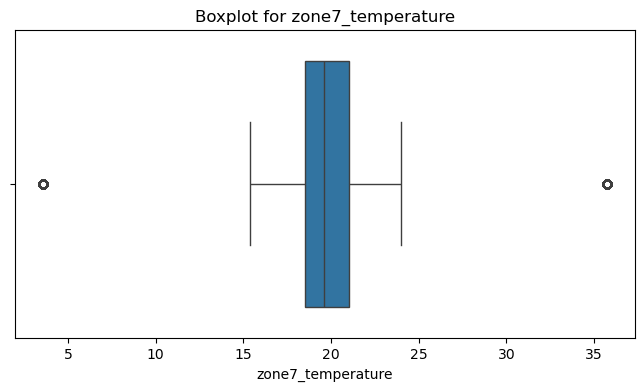

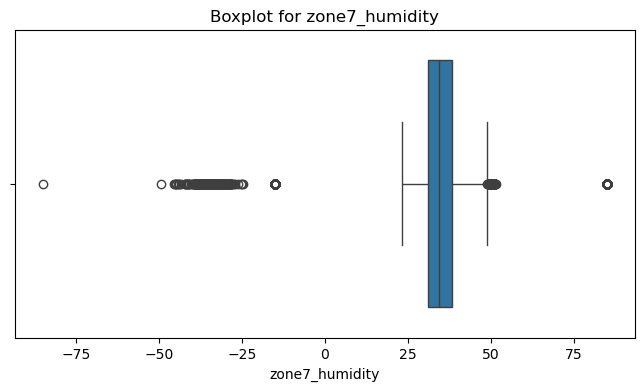

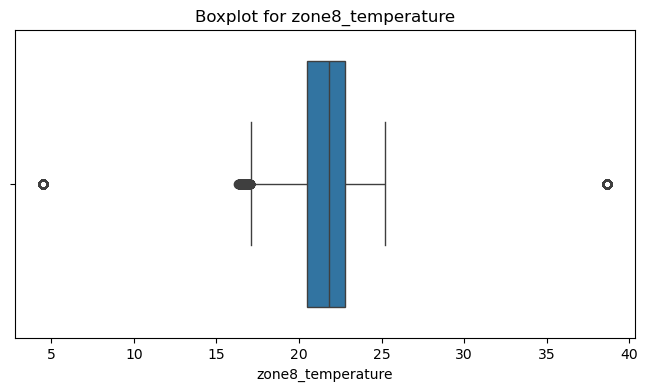

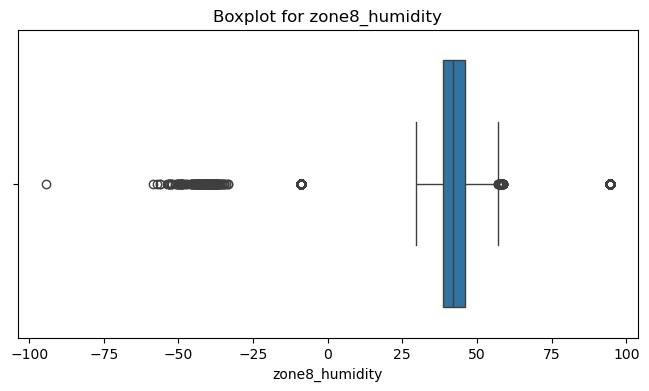

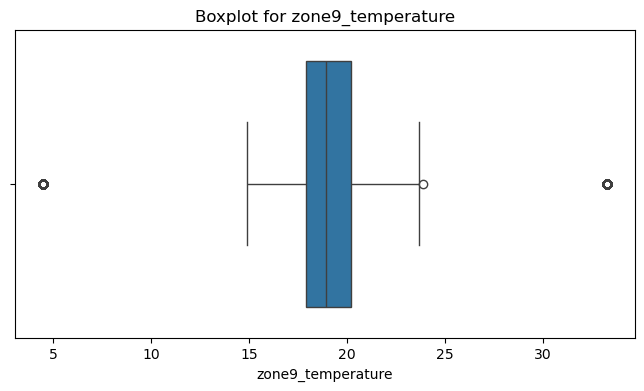

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numeric columns you want to check for outliers
columns_to_plot = df.columns[1:20]  # or list of your numeric column names

# Plot boxplots for each column
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()



In [8]:

# dropping the non-character data in column

# Convert  column to numeric, forcing invalid strings (like 'unknown') to NaN
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')

# Drop rows where temperature is NaN ( invalid or missing)
df.dropna(subset=['equipment_energy_consumption'], inplace=True)


In [9]:
df["equipment_energy_consumption"].unique()

df['equipment_energy_consumption'].value_counts().to_dict()



{50.0: 3400,
 60.0: 2385,
 40.0: 1762,
 70.0: 1193,
 80.0: 905,
 90.0: 790,
 100.0: 742,
 30.0: 656,
 110.0: 543,
 120.0: 391,
 20.0: 318,
 130.0: 256,
 140.0: 182,
 1139.9856929495108: 166,
 -944.5664110012308: 160,
 150.0: 109,
 190.0: 70,
 260.0: 68,
 280.0: 67,
 230.0: 66,
 300.0: 63,
 160.0: 62,
 240.0: 62,
 270.0: 61,
 180.0: 61,
 250.0: 60,
 220.0: 58,
 310.0: 56,
 210.0: 56,
 170.0: 55,
 370.0: 54,
 290.0: 53,
 350.0: 53,
 390.0: 52,
 320.0: 51,
 330.0: 50,
 360.0: 48,
 340.0: 48,
 200.0: 47,
 380.0: 38,
 400.0: 36,
 410.0: 34,
 -50.0: 32,
 440.0: 30,
 420.0: 27,
 430.0: 23,
 -40.0: 22,
 470.0: 18,
 450.0: 18,
 480.0: 18,
 510.0: 16,
 -60.0: 15,
 530.0: 14,
 590.0: 14,
 460.0: 13,
 490.0: 13,
 -70.0: 13,
 610.0: 12,
 600.0: 10,
 500.0: 10,
 580.0: 10,
 520.0: 10,
 10.0: 9,
 700.0: 9,
 630.0: 9,
 660.0: 9,
 540.0: 8,
 560.0: 8,
 -100.0: 8,
 -30.0: 8,
 620.0: 7,
 690.0: 7,
 640.0: 7,
 720.0: 6,
 710.0: 6,
 -110.0: 6,
 750.0: 6,
 550.0: 6,
 -130.0: 6,
 650.0: 5,
 570.0: 5,
 740.0:

In [10]:
# other column study
df["lighting_energy"].unique()

df['lighting_energy'].value_counts().to_dict()


{'0.0': 11078,
 '10.0': 1781,
 '20.0': 1267,
 '30.0': 450,
 '-77.78778596503064': 171,
 '86.00296632575207': 162,
 '-0.0': 106,
 '40.0': 67,
 '???': 24,
 '-10.0': 22,
 '-20.0': 16,
 'error': 13,
 'check': 9,
 'unknown': 9,
 '50.0': 6,
 '-30.0': 6,
 '-86.00296632575207': 3,
 '-40.0': 2,
 '60.0': 1,
 '70.0': 1}

In [11]:
df["zone1_temperature"].unique()
df['zone1_temperature'].value_counts().to_dict()


{'21.0': 452,
 '21.39': 433,
 '21.2': 420,
 '21.5': 416,
 '21.29': 404,
 '20.89': 389,
 '21.1': 371,
 '22.2': 363,
 '22.0': 353,
 '22.1': 352,
 '21.79': 351,
 '21.89': 351,
 '21.7': 344,
 '20.79': 338,
 '21.6': 313,
 '22.5': 264,
 '22.6': 263,
 '22.29': 258,
 '20.7': 258,
 '22.39': 256,
 '20.6': 243,
 '22.7': 237,
 '20.0': 217,
 '22.79': 204,
 '20.1': 200,
 '22.89': 182,
 '20.5': 181,
 '19.89': 179,
 '20.2': 169,
 '33.74660933896648': 159,
 '20.29': 153,
 '20.39': 149,
 '23.0': 149,
 '8.726817924356236': 147,
 '19.79': 142,
 '19.7': 140,
 '19.6': 133,
 '19.5': 105,
 '19.39': 99,
 '19.0': 97,
 '23.2': 93,
 '23.1': 88,
 '19.29': 83,
 '19.1': 79,
 '19.2': 76,
 '20.9266666666667': 67,
 '18.89': 65,
 '21.9266666666667': 64,
 '21.1666666666667': 63,
 '22.066666666666695': 62,
 '21.4266666666667': 61,
 '21.963333333333296': 60,
 '20.963333333333296': 59,
 '21.73': 59,
 '22.1333333333333': 59,
 '21.533333333333296': 58,
 '21.26': 57,
 '21.323333333333295': 56,
 '22.033333333333296': 56,
 '18.7

In [11]:
df["zone1_humidity"].unique()

df['zone1_humidity'].value_counts().to_dict()


{'3.348059697903068': 152,
 '76.29275599510133': 148,
 '37.2': 125,
 '39.09': 118,
 '36.9': 116,
 '37.7': 113,
 '38.29': 110,
 '39.0': 108,
 '38.79': 106,
 '37.09': 103,
 '38.09': 98,
 '37.4': 98,
 '39.4': 97,
 '38.7': 94,
 '36.29': 90,
 '38.2': 89,
 '35.4': 88,
 '38.59': 87,
 '35.2': 83,
 '39.5': 81,
 '39.2': 81,
 '39.9': 81,
 '39.59': 76,
 '35.5': 75,
 '43.29': 73,
 '37.0': 73,
 '38.0': 72,
 '36.09': 71,
 '35.29': 71,
 '37.5': 71,
 '37.9': 70,
 '35.79': 68,
 '37.29': 67,
 '38.4': 66,
 '37.59': 66,
 '41.29': 66,
 '35.7': 64,
 '41.5': 64,
 '39.7': 63,
 '43.7': 63,
 '41.0': 62,
 '38.9': 61,
 '36.2': 60,
 '42.09': 59,
 '38.5': 59,
 '36.59': 58,
 '37.79': 58,
 '39.29': 57,
 '43.09': 57,
 '41.4': 56,
 '40.29': 56,
 '41.2': 55,
 '40.5': 55,
 '39.79': 55,
 '43.79': 55,
 '42.4': 55,
 '36.7': 55,
 '36.79': 55,
 '35.0': 54,
 '42.5': 54,
 '43.4': 54,
 '35.59': 52,
 '40.9': 52,
 '43.9': 51,
 '41.9': 51,
 '44.0': 51,
 '41.7': 50,
 '43.59': 50,
 '40.59': 50,
 '36.0': 50,
 '40.0': 49,
 '35.09': 49,


In [13]:

df["zone2_temperature"].unique()

df['zone2_temperature'].value_counts().to_dict()


{'19.6': 287,
 '19.5': 284,
 '19.2': 282,
 '19.7': 278,
 '19.29': 253,
 '19.1': 246,
 '19.39': 238,
 '19.0': 232,
 '18.79': 230,
 '20.29': 227,
 '19.79': 221,
 '18.39': 220,
 '20.5': 219,
 '18.89': 219,
 '18.5': 217,
 '20.1': 216,
 '18.2': 209,
 '20.0': 203,
 '18.1': 199,
 '19.89': 196,
 '20.39': 193,
 '18.7': 191,
 '20.6': 188,
 '20.2': 183,
 '18.6': 180,
 '20.7': 175,
 '36.55288237266245': 170,
 '18.29': 170,
 '20.89': 163,
 '18.0': 162,
 '21.1': 162,
 '17.79': 158,
 '2.9881989040997503': 147,
 '20.79': 141,
 '21.2': 137,
 '21.0': 133,
 '17.5': 130,
 '21.29': 125,
 '17.89': 124,
 '21.7': 124,
 '17.7': 115,
 '21.89': 108,
 '17.6': 98,
 '21.5': 97,
 '17.29': 90,
 '17.39': 89,
 '21.6': 86,
 '19.566666666666695': 85,
 '17.2': 85,
 '17.1': 82,
 '22.0': 74,
 '21.39': 73,
 '21.79': 72,
 '19.1333333333333': 68,
 '16.89': 65,
 '18.823333333333295': 62,
 '22.1': 62,
 '19.6333333333333': 62,
 '19.323333333333295': 60,
 '19.8566666666667': 59,
 '19.26': 59,
 '20.566666666666695': 58,
 '19.76': 5

In [12]:
def non_numeric_remover(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    df = df.dropna(subset=[column_name])
    return df

In [17]:
df=non_numeric_remover(df, "equipment_energy_consumption") # i substituted for 4 object dtype columns 


In [19]:
df.to_csv('non_nemric_removed.csv', index=False)

In [20]:
df.shape   # some rows are removed

(12799, 29)

#### Till now I tried to remove the row with non numeric values;  row reduced from (16857) to (12799)

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   smart_factory_energy_prediction.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/

no changes added to commit (use "git add" and/or "git commit -a")


In [77]:
# commit data
!git status


#commit 
!git add smart_factory_energy_prediction.ipynb
!git commit -m "Preprocessing: Removed non-numeric values from 'equipment_energy_consumption',lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature"
!git push origin main

[main 851a6bb] Preprocessing: Removed non-numeric values from 'equipment_energy_consumption',lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature
 1 file changed, 32 insertions(+), 9 deletions(-)


To https://github.com/Sudeep-Sapkota/DS-Intern-Assignment--Sudeep_Sapkota-.git
   6e6bc5d..851a6bb  main -> main


In [73]:
df.isnull().sum()

equipment_energy_consumption      0
lighting_energy                   0
zone1_temperature                 0
zone1_humidity                    0
zone2_temperature                 0
zone2_humidity                  681
zone3_temperature               599
zone3_humidity                  654
zone4_temperature               639
zone4_humidity                  592
zone5_temperature               630
zone5_humidity                  608
zone6_temperature               656
zone6_humidity                  639
zone7_temperature               589
zone7_humidity                  600
zone8_temperature               633
zone8_humidity                  582
zone9_temperature               594
zone9_humidity                  683
outdoor_temperature             607
atmospheric_pressure            653
outdoor_humidity                604
wind_speed                      633
visibility_index                615
dew_point                       623
random_variable1                608
random_variable2            

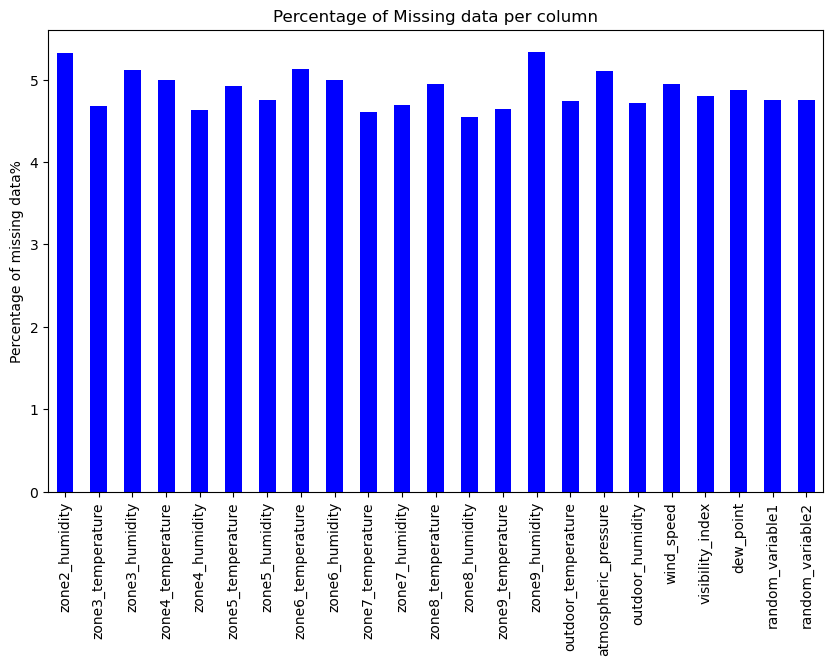

In [72]:
# Visualizing missing data as a bar plot
missing_data = df.isnull().mean() * 100  # Percentage of missing data per column
missing_data = missing_data[missing_data > 0]  # Only columns with missing data
missing_data.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Percentage of Missing data per column')
plt.ylabel('Percentage of missing data%')
plt.show()



In [23]:
# understanding the distribution
df.describe()


,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12118.000000,12200.000000,12145.000000,12160.000000,12207.000000,...,12205.000000,12116.000000,12192.000000,12146.000000,12195.000000,12166.000000,12184.000000,12176.000000,12191.000000,12191.000000
mean,95.056935,3.872928,21.265792,39.069961,19.804304,39.472915,21.658924,38.113092,20.245158,37.947905,...,18.861658,40.325636,6.221287,755.780347,78.899486,4.172699,38.537050,2.747512,24.869540,25.101668
std,180.659943,14.744025,2.194633,9.854723,2.954454,10.010114,2.626665,10.338425,2.773032,10.727844,...,2.509393,11.130238,7.693695,13.559764,28.262844,4.408763,21.398240,6.132992,26.084683,25.830670
min,-1139.985693,-86.002966,8.726818,-46.400000,2.988199,-77.265503,6.543921,-71.406273,4.613485,-50.290000,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,50.000000,0.000000,20.533333,37.030000,18.600000,37.730000,20.533333,36.617500,19.267500,35.200000,...,17.890000,38.230000,3.000000,750.833333,71.000000,2.000000,29.000000,0.433333,12.079695,12.055228
50%,60.000000,0.000000,21.356667,39.230000,19.626667,40.290000,21.790000,38.400000,20.290000,38.090000,...,18.890000,40.360000,6.000000,756.216667,84.000000,4.000000,40.000000,2.766667,24.837556,24.834261
75%,100.000000,0.000000,22.100000,42.485833,20.790000,42.984167,22.760000,41.433333,21.390000,41.530000,...,20.200000,43.737500,9.300000,762.100000,91.833333,5.833333,40.000000,5.300000,37.897387,37.955683
max,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,81.446225,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [28]:
# applying transforation to skewd dataset
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

df[['zone1_temperature']] = pt.fit_transform(df[['zone1_temperature']])
df[['equipment_energy_consumption']] = pt.fit_transform(df[['equipment_energy_consumption']])
df[['zone1_humidity']] = pt.fit_transform(df[['zone1_humidity']])
df[['zone2_temperature']] = pt.fit_transform(df[['zone2_temperature']])
# as these 4 column has sekewd distribution


In [45]:
from sklearn.preprocessing import StandardScaler

# Example: scale first N columns (e.g., first 3 columns)
  # change this to however many columns you want to scale
columns_to_scale = df.columns[1:]

scaler = StandardScaler()
df_scaled = df_f.copy()   # df_f is absolute values 
df_scaled[columns_to_scale] = scaler.fit_transform(df_f[columns_to_scale])


In [46]:
df_scaled.describe()


,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,12799.000000,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,...,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04,1.279900e+04
mean,116.226477,-2.664743e-17,1.279077e-15,-4.396827e-16,-8.171880e-16,-5.240662e-16,2.131795e-16,4.085940e-16,1.421197e-16,-1.065897e-16,...,7.105983e-17,-1.083662e-15,-1.776496e-17,-6.204411e-15,1.421197e-16,1.287959e-16,2.220620e-17,-3.552991e-17,-1.077000e-16,-3.108867e-17
std,167.823992,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,...,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,10.000000,-4.109717e-01,-5.713694e+00,-5.807158e+00,-5.692004e+00,-5.580183e+00,-5.896310e+00,-6.134787e+00,-5.784277e+00,-4.868949e+00,...,-5.871119e+00,-5.902109e+00,-1.082776e+00,-5.877953e+00,-2.866083e+00,-1.201021e+00,-2.285444e+00,-8.402688e-01,-1.214816e+00,-1.210490e+00
25%,50.000000,-4.109717e-01,-3.337630e-01,-4.319613e-01,-4.076392e-01,-3.255989e-01,-4.153070e-01,-4.304638e-01,-3.418874e-01,-4.782064e-01,...,-3.970708e-01,-4.046425e-01,-5.533876e-01,-3.484413e-01,-5.175677e-01,-6.352161e-01,-6.019765e-01,-5.194917e-01,-6.322325e-01,-6.322712e-01
50%,60.000000,-4.109717e-01,4.140923e-02,-8.149446e-02,-6.012768e-02,2.011573e-02,4.871956e-02,-1.305455e-01,1.576249e-02,-8.900705e-02,...,1.102946e-02,-1.223087e-01,-1.752531e-01,3.134641e-02,1.229365e-01,-1.564582e-01,-2.147035e-02,-2.152494e-01,-1.167678e-01,-1.142591e-01
75%,100.000000,2.982782e-01,3.801275e-01,4.298686e-01,3.336435e-01,3.985399e-01,4.035634e-01,3.962179e-01,3.857452e-01,3.602041e-01,...,5.048308e-01,3.378271e-01,3.163217e-01,4.502485e-01,5.232517e-01,3.222997e-01,-2.147035e-02,2.411140e-01,4.583474e-01,4.599941e-01
max,1139.985693,5.688788e+00,5.687194e+00,5.813160e+00,5.669147e+00,5.602200e+00,5.911044e+00,6.161310e+00,5.799015e+00,5.997274e+00,...,5.866457e+00,5.918438e+00,6.457817e+00,5.873971e+00,7.471055e+00,6.455289e+00,6.921740e+00,6.634907e+00,6.309215e+00,6.309740e+00


In [29]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,38.400000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [34]:
df.head(-5)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,0.391106,0.047761,1.000000,0.509038,0.444229,0.789845,0.437452,0.768884,0.459521,...,0.436584,0.779043,0.504983,0.356497,0.707517,0.555831,0.600695,0.536006,0.459640,0.459811
1,2016-01-11 17:10:00,0.391106,0.674413,0.417930,0.495510,0.444229,0.789408,0.437452,0.813628,0.459521,...,0.437743,0.779227,0.503648,0.357142,0.707517,0.549197,0.584851,0.534573,0.478001,0.478146
2,2016-01-11 17:20:00,0.386020,0.674413,0.417930,0.489660,0.444229,0.788788,0.437452,0.814632,1.000000,...,0.435425,0.778859,0.502313,0.357786,0.707517,0.542563,0.569006,0.533139,0.512571,0.512667
3,2016-01-11 17:30:00,0.386020,0.732550,1.000000,0.486201,0.444229,0.788551,0.437452,0.815098,0.500725,...,0.435425,0.778246,0.500978,0.358430,0.707517,0.535930,0.553162,1.000000,0.570325,0.570339
4,2016-01-11 17:40:00,0.391106,0.732550,0.417930,0.490155,0.444229,0.788162,0.437452,0.815098,0.456007,...,0.000000,0.778246,0.499643,0.359074,0.707517,0.529296,0.537318,0.530273,0.448648,0.448834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16844,2016-05-07 04:20:00,0.380980,0.500000,0.575972,0.368467,0.518504,0.752808,0.593000,0.766970,0.606450,...,0.601968,0.765314,0.567165,0.475888,0.689472,0.436424,0.505629,0.538395,0.500705,0.500818
16848,2016-08-02 18:20:00,0.619880,0.616275,0.540551,0.450505,0.543122,0.758416,0.595202,0.799880,0.526597,...,0.501138,0.754712,0.520243,0.407174,0.657141,0.496127,0.467051,0.498264,0.421043,0.421268
16849,2016-09-02 21:40:00,0.427588,0.500000,0.540551,0.451081,0.539818,0.763960,0.530253,0.804805,0.468784,...,0.501138,0.750421,0.000000,0.383554,1.000000,0.562465,0.505629,0.492053,0.583665,0.499567
16850,2016-09-04 03:00:00,0.386020,0.500000,0.466411,0.416904,0.419828,0.792023,0.547866,0.779387,0.507432,...,0.000000,0.763537,0.484383,0.477606,0.705261,0.456325,0.439496,0.510207,0.468423,0.468582


In [41]:
#removing timestamp as not useful for prediction
df.drop("timestamp",axis=1,inplace=True)
df_f = df.abs() # making all values positive as humidity and energy consum cat be negative

In [36]:
# data is cleaned and ready for further process!!

In [38]:
# commit data
!git status


#commit 
!git add smart_factory_energy_prediction.ipynb
!git commit -m "Data is cleaned and now ready for further processing"
!git push origin main

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/

nothing added to commit but untracked files present (use "git add" to track)
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/

nothing added to commit but untracked files present (use "git add" to track)


Everything up-to-date


### Target feature -->equipment_energy_consumption  , so making it target label


In [47]:
X = df_scaled.drop('equipment_energy_consumption', axis=1)  # Features
y = df_scaled['equipment_energy_consumption']               # Target


In [201]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)  # 20% test data


RMSE: 175.065
MAE: 90.388
R² Score: 0.012


In [50]:
df_scaled.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,60.0,5.106126,5.687194,1.241783,-0.204548,0.699468,-0.731157,-0.130545,-0.461515,0.960556,...,-0.746677,0.635303,-0.084501,-1.688423,0.549939,0.626964,1.313694,0.211351,-0.628044,-0.624611
1,60.0,1.716778,-0.626914,1.097880,-0.204548,0.689277,-0.731157,1.087555,-0.461515,1.020334,...,-0.733073,0.639700,-0.102147,-1.680853,0.549939,0.539917,1.091166,0.191509,-0.392318,-0.389244
2,50.0,1.716778,-0.626914,1.035220,-0.204548,0.674810,-0.731157,1.114878,5.799015,1.005945,...,-0.760280,0.630907,-0.119793,-1.673282,0.549939,0.452870,0.868639,0.171667,0.051494,0.053892
3,50.0,2.426028,5.687194,0.998050,-0.204548,0.669274,-0.731157,1.127587,0.015762,0.982549,...,-0.760280,0.616253,-0.137440,-1.665712,0.549939,0.365823,0.646112,6.634907,0.792961,0.794231
4,60.0,2.426028,-0.626914,1.040531,-0.204548,0.660216,-0.731157,1.127587,-0.502213,0.955409,...,-5.871119,0.616253,-0.155086,-1.658141,0.549939,0.278776,0.423584,0.131984,-0.769164,-0.765517


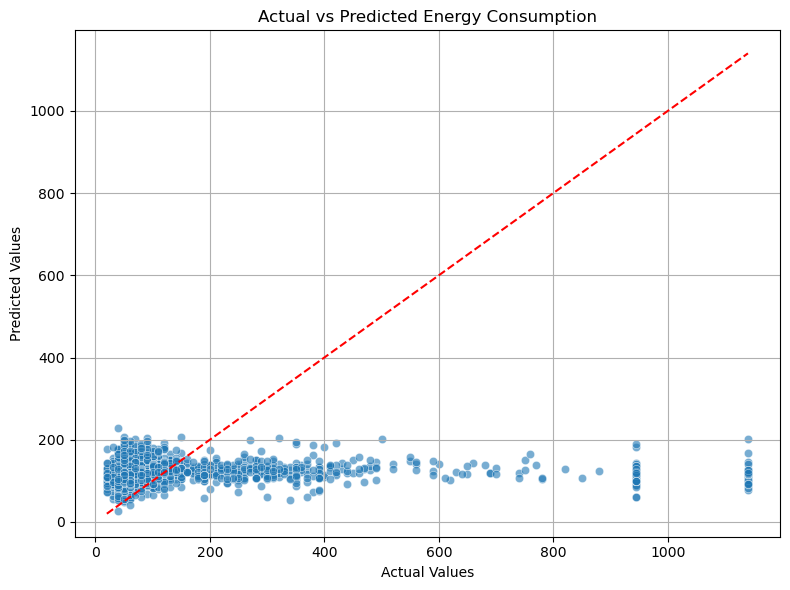

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Energy Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

#Print result
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest MAE: {mae_rf:.3f}")
print(f"Random Forest R² Score: {r2_rf:.3f}")


Random Forest RMSE: 171.214
Random Forest MAE: 82.286
Random Forest R² Score: 0.055


In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: array length 2560 does not match index length 2048

<Figure size 800x600 with 0 Axes>

In [52]:
# commit data
!git status


#commit 
!git add smart_factory_energy_prediction.ipynb
!git commit -m "trained and tested the linear regression and random forest but getting poor results"
!git push origin main

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   smart_factory_energy_prediction.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/

no changes added to commit (use "git add" and/or "git commit -a")


[main fc6b1d7] trained and tested the linear regression and random forest but getting poor results
 1 file changed, 299 insertions(+), 236 deletions(-)


To https://github.com/Sudeep-Sapkota/DS-Intern-Assignment--Sudeep_Sapkota-.git
   682420e..fc6b1d7  main -> main


In [53]:
# reiterte the processes 

In [57]:
# feature engineering
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,0.391106,0.047761,1.00000,0.509038,0.444229,0.789845,0.437452,0.768884,0.459521,0.727641,...,0.436584,0.779043,0.504983,0.356497,0.707517,0.555831,0.600695,0.536006,0.459640,0.459811
1,0.391106,0.674413,0.41793,0.495510,0.444229,0.789408,0.437452,0.813628,0.459521,0.730873,...,0.437743,0.779227,0.503648,0.357142,0.707517,0.549197,0.584851,0.534573,0.478001,0.478146
2,0.386020,0.674413,0.41793,0.489660,0.444229,0.788788,0.437452,0.814632,1.000000,0.730095,...,0.435425,0.778859,0.502313,0.357786,0.707517,0.542563,0.569006,0.533139,0.512571,0.512667
3,0.386020,0.732550,1.00000,0.486201,0.444229,0.788551,0.437452,0.815098,0.500725,0.728830,...,0.435425,0.778246,0.500978,0.358430,0.707517,0.535930,0.553162,1.000000,0.570325,0.570339
4,0.391106,0.732550,0.41793,0.490155,0.444229,0.788162,0.437452,0.815098,0.456007,0.727363,...,0.000000,0.778246,0.499643,0.359074,0.707517,0.529296,0.537318,0.530273,0.448648,0.448834


In [69]:
df2=df.drop("random_variable1",axis=1) # lets drop random variable 2


In [74]:
X = df2.drop('equipment_energy_consumption', axis=1)  # Features
y = df2['equipment_energy_consumption']               # Target
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)  # 20% test data


In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#  Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R² Score: {r2:.3f}")


RMSE: 182.600
MAE: 80.906
R² Score: -0.003


#### by removing random varibale1 and 2 ;  R^2 decreases

In [211]:
### testing area

In [231]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Kernel Ridge Regression model (RBF kernel)
model = KernelRidge(kernel='rbf')

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred_test = model.predict(X_test)

# Evaluate performance on test data
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print("Evaluation metrics: Test Data")
print("Mean Absolute Error: ", mae_test)
print("Mean Squared Error: ", mse_test)
print("R² Score: ", r2_test)


Evaluation metrics: Test Data
Mean Absolute Error:  80.39368658072932
Mean Squared Error:  33081.63232331851
R² Score:  0.0043637207765657715


In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Predict on test data
y_pred_test = rf_model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# 5. Print results
print("Random Forest Performance on Test Data:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Random Forest Performance on Test Data:
Mean Absolute Error: 80.14136220984682
Mean Squared Error: 33927.120091069606
R² Score: -0.02108237229965959


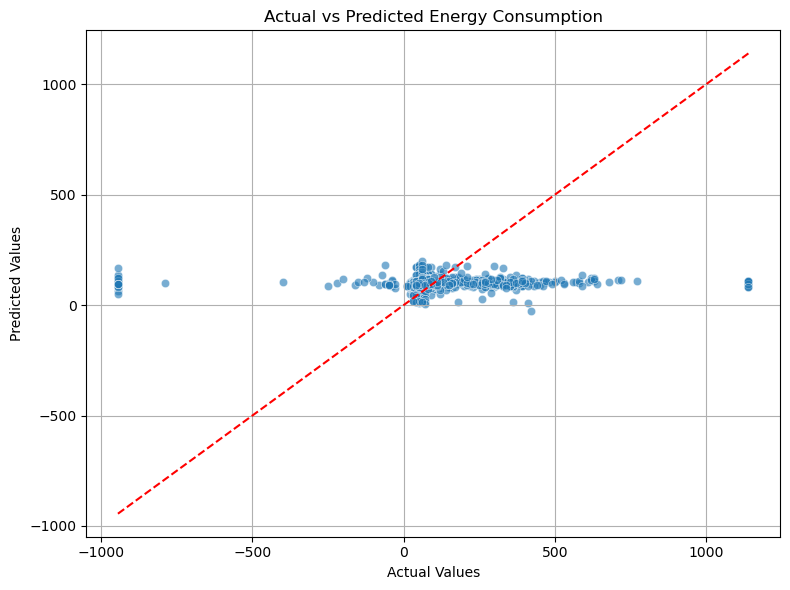

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Energy Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()


In [257]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 2. Train the model
gbr.fit(X_train, y_train)

# 3. Predict on test data
y_pred_gbr = gbr.predict(X_test)

# 4. Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# 5. Print results
print("Gradient Boosting Performance on Test Data:")
print("Mean Absolute Error:", mae_gbr)
print("Mean Squared Error:", mse_gbr)
print("R² Score:", r2_gbr)


Gradient Boosting Performance on Test Data:
Mean Absolute Error: 77.47035958769654
Mean Squared Error: 32681.03239520758
R² Score: 0.016420315142388398


In [ ]:
# commit data
!git status


#commit 
!git add smart_factory_energy_prediction.ipynb
!git commit -m "stuck in the loop of improving "
!git push origin main